In [55]:
from itertools import count

import pandas as pd
import csv
import yfinance as yf

import numpy as np  
import matplotlib.pyplot as plt  
import seaborn as sns 
import statsmodels.api as sm
import fredapi
import statsmodels.formula.api as smf


from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [2]:
#read Houseprices data
adv = pd.read_csv(r"HousePrices.csv")


#view first 5 rows of the data
adv[:5]

,price,lotsize,bedrooms,bathrooms,stories,driveway,recreation,fullbase,gasheat,aircon,garage,prefer
0,42000.0,5850,3,1,2,yes,no,yes,no,no,1,no
1,38500.0,4000,2,1,1,yes,no,no,no,no,0,no
2,49500.0,3060,3,1,1,yes,no,no,no,no,0,no
3,60500.0,6650,3,1,2,yes,yes,no,no,no,0,no
4,61000.0,6360,2,1,1,yes,no,no,no,no,0,no


In [5]:
# Shows the first five rows of the data
adv.head()


,price,lotsize,bedrooms,bathrooms,stories,driveway,recreation,fullbase,gasheat,aircon,garage,prefer
0,42000.0,5850,3,1,2,yes,no,yes,no,no,1,no
1,38500.0,4000,2,1,1,yes,no,no,no,no,0,no
2,49500.0,3060,3,1,1,yes,no,no,no,no,0,no
3,60500.0,6650,3,1,2,yes,yes,no,no,no,0,no
4,61000.0,6360,2,1,1,yes,no,no,no,no,0,no


In [7]:
#Checking the number of rows and columns
adv.shape

(546, 12)

In [9]:
#To see the statistical details of the dataset, we can use describe():
adv.describe()

,price,lotsize,bedrooms,bathrooms,stories,garage
count,546.000000,546.000000,546.000000,546.000000,546.000000,546.000000
mean,68121.597070,5150.265568,2.965201,1.285714,1.807692,0.692308
std,26702.670926,2168.158725,0.737388,0.502158,0.868203,0.861307
min,25000.000000,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,49125.000000,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,62000.000000,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,82000.000000,6360.000000,3.000000,2.000000,2.000000,1.000000
max,190000.000000,16200.000000,6.000000,4.000000,4.000000,3.000000


In [ ]:
#Part 1 - ii
#page 126 of textbook

i.	Construct a summary stat for all the variables in the HousePrices data. (provide Mean, Median, Max, Min, and Std Dev of the data for all variables) (4 points)

In [6]:
adv.describe()

,price,lotsize,bedrooms,bathrooms,stories,garage
count,546.000000,546.000000,546.000000,546.000000,546.000000,546.000000
mean,68121.597070,5150.265568,2.965201,1.285714,1.807692,0.692308
std,26702.670926,2168.158725,0.737388,0.502158,0.868203,0.861307
min,25000.000000,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,49125.000000,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,62000.000000,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,82000.000000,6360.000000,3.000000,2.000000,2.000000,1.000000
max,190000.000000,16200.000000,6.000000,4.000000,4.000000,3.000000


ii.	What is the percentage of houses in the data with Driveway, Gas-Heat and Air-conditioning present?  (Hint: find the mean after creating dummy variables with driveway, gasheat, and aircon variables respectively).

In [3]:
adv_length = len(adv)
adv_filtered_df = adv[(adv['driveway'] == 'yes') & (adv['aircon'] == 'yes') & (adv['gasheat'] == 'yes')]
adv_filtered_df_len = len(adv_filtered_df)
adv_percentage = (adv_filtered_df_len / adv_length) * 100
adv_percentage_rounded = round(adv_percentage, 2)
print(f'The percentage is {adv_percentage_rounded} ')
#print(adv)

The percentage is 0.18 


iii.	Construct a linear regression model to test whether number of bedrooms influence house prices.  Provide a summary of the linear regression model using summary() function.  			(5 points)

In [4]:
X = sm.add_constant(adv['bedrooms']) 
model = sm.OLS(adv['price'], X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.134
Model:                            OLS   Adj. R-squared:                  0.133
Method:                 Least Squares   F-statistic:                     84.38
Date:                Sat, 15 Feb 2025   Prob (F-statistic):           8.53e-19
Time:                        11:44:21   Log-Likelihood:                -6300.0
No. Observations:                 546   AIC:                         1.260e+04
Df Residuals:                     544   BIC:                         1.261e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2.877e+04   4413.753      6.519      0.0

iv.	Construct a multiple linear regression model by including all variables as predictors of house prices (response variable) and observe the effect on the house prices. Provide a summary of the regression model using summary() function.  (5 points)

In [5]:
def map_function(x):
    return 1 if x else 0

columns_to_convert = ['driveway', 'recreation', 'fullbase', 'gasheat', 'aircon', 'prefer']
adv2 = adv
adv2[columns_to_convert] = adv2[columns_to_convert].map(map_function)

X = sm.add_constant(adv[['lotsize', 'bedrooms', 'bathrooms', 'stories', 'driveway', 'recreation', 'fullbase', 'gasheat', 'aircon', 'garage', 'prefer']])
model = sm.OLS(adv['price'], X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.561
Model:                            OLS   Adj. R-squared:                  0.557
Method:                 Least Squares   F-statistic:                     138.2
Date:                Sat, 15 Feb 2025   Prob (F-statistic):           3.38e-94
Time:                        11:44:25   Log-Likelihood:                -6114.4
No. Observations:                 546   AIC:                         1.224e+04
Df Residuals:                     540   BIC:                         1.227e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
lotsize        4.7334      0.380     12.462      0.0

Part 2: 		(20 points)
Use the Credit data to perform the following tests using Linear Regression settings:
A.	Perform the following steps: 	(5 points) 
i.	Observe the dimension of the Credit data.	(1 points)	
ii.	Provide a summary stat for the variables in Credit data.		(1 points)
iii.	What is the percentage of Student in the Credit data? What is the percentage of Female in the Credit data? What is the percentage of Student who are Female in the Credit data?	(3 points)


In [4]:
df = pd.read_csv(r"Credit.csv")
print(df.shape)
print(df.describe())
studentpct = (df['Student'] == 'Yes').sum()/400
print("the percentage of students is:",studentpct)
femalepct = (df['Gender'] == 'Female').sum()/400
print ("The percent of users identifying as female is:", femalepct)

(400, 12)
       Unnamed: 0      Income         Limit      Rating       Cards  \
count  400.000000  400.000000    400.000000  400.000000  400.000000   
mean   200.500000   45.218885   4735.600000  354.940000    2.957500   
std    115.614301   35.244273   2308.198848  154.724143    1.371275   
min      1.000000   10.354000    855.000000   93.000000    1.000000   
25%    100.750000   21.007250   3088.000000  247.250000    2.000000   
50%    200.500000   33.115500   4622.500000  344.000000    3.000000   
75%    300.250000   57.470750   5872.750000  437.250000    4.000000   
max    400.000000  186.634000  13913.000000  982.000000    9.000000   

              Age   Education      Balance  
count  400.000000  400.000000   400.000000  
mean    55.667500   13.450000   520.015000  
std     17.249807    3.125207   459.758877  
min     23.000000    5.000000     0.000000  
25%     41.750000   11.000000    68.750000  
50%     56.000000   14.000000   459.500000  
75%     70.000000   16.000000   863

B.	Construct a linear regression model to test the following: 	(15 points)

Test how Credit Rating and Student effect Credit Card Balance. In the same model, also test whether the effect of Credit Rating on Credit Card Balance is different for students vs. non-students.

Provide a summary of the model. 


Part 3: 		(20 points)
Use the Credit data to perform the following tests using Linear Regression settings: Online quiz will be based on the results of the regressions performed below.


i.	Test whether Age influence Credit Card Balance on the basis of simple linear regression.
(Provide a summary of the model).  (2 points)


In [5]:
df = pd.read_csv(r"Credit.csv")
df.head()


,Unnamed: 0,Income,Limit,Rating,Cards,Age,Education,Gender,Student,Married,Ethnicity,Balance
0,1,14.891,3606,283,2,34,11,Male,No,Yes,Caucasian,333
1,2,106.025,6645,483,3,82,15,Female,Yes,Yes,Asian,903
2,3,104.593,7075,514,4,71,11,Male,No,No,Asian,580
3,4,148.924,9504,681,3,36,11,Female,No,No,Asian,964
4,5,55.882,4897,357,2,68,16,Male,No,Yes,Caucasian,331


ii.	Use Age and Credit Rating as predictors of Credit Card Balance (response variable) in a multiple linear regression setting. (Provide a summary of the model). (2 points)  



iii.	Compare effect of Age from part (i) and (ii): Write the explanation for part (iii) in Python code. (10 points)



iv.	Observe the distribution of Age. Construct 3 dummy variables based on Age distribution: (6 points)
1. Age 40 and below (Age=<40)
2. Age Between 41 to 56 (41=<Age<=56)
3. Age group over 56 (Age>56)

Construct model to observe whether credit card balance is significantly different for different age group. Consider the age group over 56 as the baseline. 


Part 4: 		(40 points)
i.	Download monthly price data of S&P500 and a stock of your choice for the period 01/01/2005 to 12/31/2019 (or any fifteen year period)   					(2 points)


In [192]:
sp500_df = yf.download(tickers='^GSPC', start="2005-01-01", end="2019-12-31", interval="1mo")
apple_df = yf.download(tickers='AAPL', start="2005-01-01", end="2019-12-31", interval="1mo")

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


ii.	Compute the monthly returns for the S&P 500 and the stock. Construct one data frame to store the return series. (2 points)

In [193]:
sp500_df = sp500_df['Close'].pct_change()
apple_df = apple_df['Close'].pct_change()

df = pd.concat([sp500_df, apple_df], axis=1)
print(df)


Ticker         ^GSPC      AAPL
Date                          
2005-01-01       NaN       NaN
2005-02-01  0.018903  0.166711
2005-03-01 -0.019118 -0.071110
2005-04-01 -0.020109 -0.134629
2005-05-01  0.029952  0.102607
...              ...       ...
2019-08-01 -0.018092 -0.020184
2019-09-01  0.017181  0.077039
2019-10-01  0.020432  0.110684
2019-11-01  0.034047  0.074328
2019-12-01  0.028590  0.102083

[180 rows x 2 columns]


iii.	Construct summary statistics, histogram, correlation matrix of the return series. 

Ticker       ^GSPC        AAPL
count   179.000000  179.000000
mean      0.006443    0.027531
std       0.039905    0.091430
min      -0.169425   -0.329558
25%      -0.015040   -0.023398
50%       0.011576    0.033790
75%       0.029851    0.086060
max       0.107723    0.237701


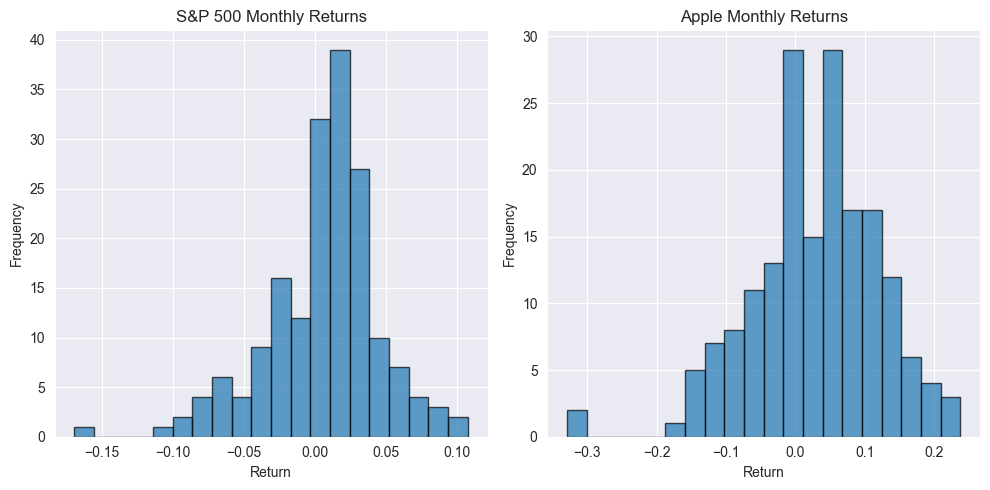

Correlation Matrix:
Ticker     ^GSPC      AAPL
Ticker                    
^GSPC   1.000000  0.549309
AAPL    0.549309  1.000000


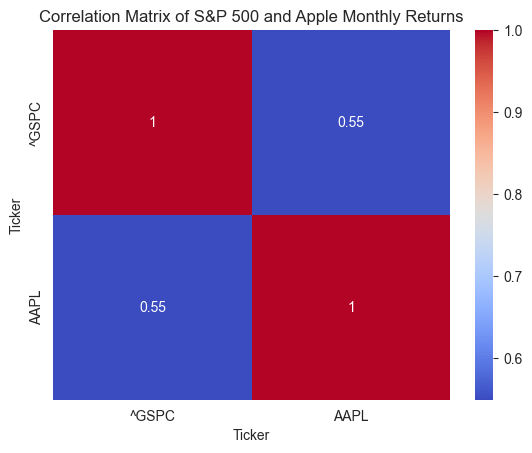

In [194]:
summary_stats = df.describe()
print(summary_stats)

# Plot histograms
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.hist(df['^GSPC'].dropna(), bins=20, edgecolor='k', alpha=0.7)
plt.title('S&P 500 Monthly Returns')
plt.xlabel('Return')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
plt.hist(df['AAPL'].dropna(), bins=20, edgecolor='k', alpha=0.7)
plt.title('Apple Monthly Returns')
plt.xlabel('Return')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

# Correlation matrix
correlation_matrix = df.corr()
print("Correlation Matrix:")
print(correlation_matrix)

# Plot correlation matrix
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of S&P 500 and Apple Monthly Returns')
plt.show()

iv.	Download 3 month TBill rate from Fred. Consider the TBill data  for the same sample period 01/01/2005 to 12/31/2019 (or any fifteen year period that you have chosen) . (7 points)

In [195]:
fred_api_key = '91f5a783ac7a912b0ccb8839abe17117'
fred = fredapi.Fred(fred_api_key)

t_bill = fred.get_series(series_id='TB3MS', observation_start='2005-01-01', observation_end='2019-12-31', interval='1mo')
tbill_df = pd.DataFrame(t_bill, columns=['TBill Rate'])
tbill_df['TBill Rate'] = tbill_df['TBill Rate'] / 100
tbill_df['Monthly Rate'] = tbill_df['TBill Rate'] / 12
print(tbill_df.head())

            TBill Rate  Monthly Rate
2005-01-01      0.0233      0.001942
2005-02-01      0.0254      0.002117
2005-03-01      0.0274      0.002283
2005-04-01      0.0278      0.002317
2005-05-01      0.0284      0.002367


v.	Construct a matrix of return series combining Stock, S&P500, and TBill for the sample period. Construct return series with columns of excess returns of the stock (Stock return – TBill) and S&P500 (S&P500 return – Tbill)

In [188]:
print(tbill_df.head())
print('*****************')
print(t_bill.head())

            TBill Rate  Monthly Rate
2005-01-01      0.0233      0.001942
2005-02-01      0.0254      0.002117
2005-03-01      0.0274      0.002283
2005-04-01      0.0278      0.002317
2005-05-01      0.0284      0.002367
*****************
2005-01-01    2.33
2005-02-01    2.54
2005-03-01    2.74
2005-04-01    2.78
2005-05-01    2.84
dtype: float64


In [181]:
t_bill = pd.DataFrame(t_bill, columns=['TBill Rate'])
t_bill['Monthly Rate'] = t_bill['TBill Rate'] / 12
df.to_csv("aaa.csv")
t_bill.to_csv("bbb.csv")

Ticker         ^GSPC      AAPL  T-Bill Rate  Monthly Rate
Date                                                     
2005-01-01       NaN       NaN       0.0233      0.001942
2005-02-01  0.018903  0.166711       0.0254      0.002117
2005-03-01 -0.019118 -0.071110       0.0274      0.002283
2005-04-01 -0.020109 -0.134629       0.0278      0.002317
2005-05-01  0.029952  0.102607       0.0284      0.002367
...              ...       ...          ...           ...
2019-08-01 -0.018092 -0.020184       0.0195      0.001625
2019-09-01  0.017181  0.077039       0.0189      0.001575
2019-10-01  0.020432  0.110684       0.0165      0.001375
2019-11-01  0.034047  0.074328       0.0154      0.001283
2019-12-01  0.028590  0.102083       0.0154      0.001283

[180 rows x 4 columns]
Matrix of Return Series with Excess Returns:
Ticker         ^GSPC      AAPL  T-Bill Rate  Monthly Rate  Excess Return AAPL  \
Date                                                                            
2005-01-01     

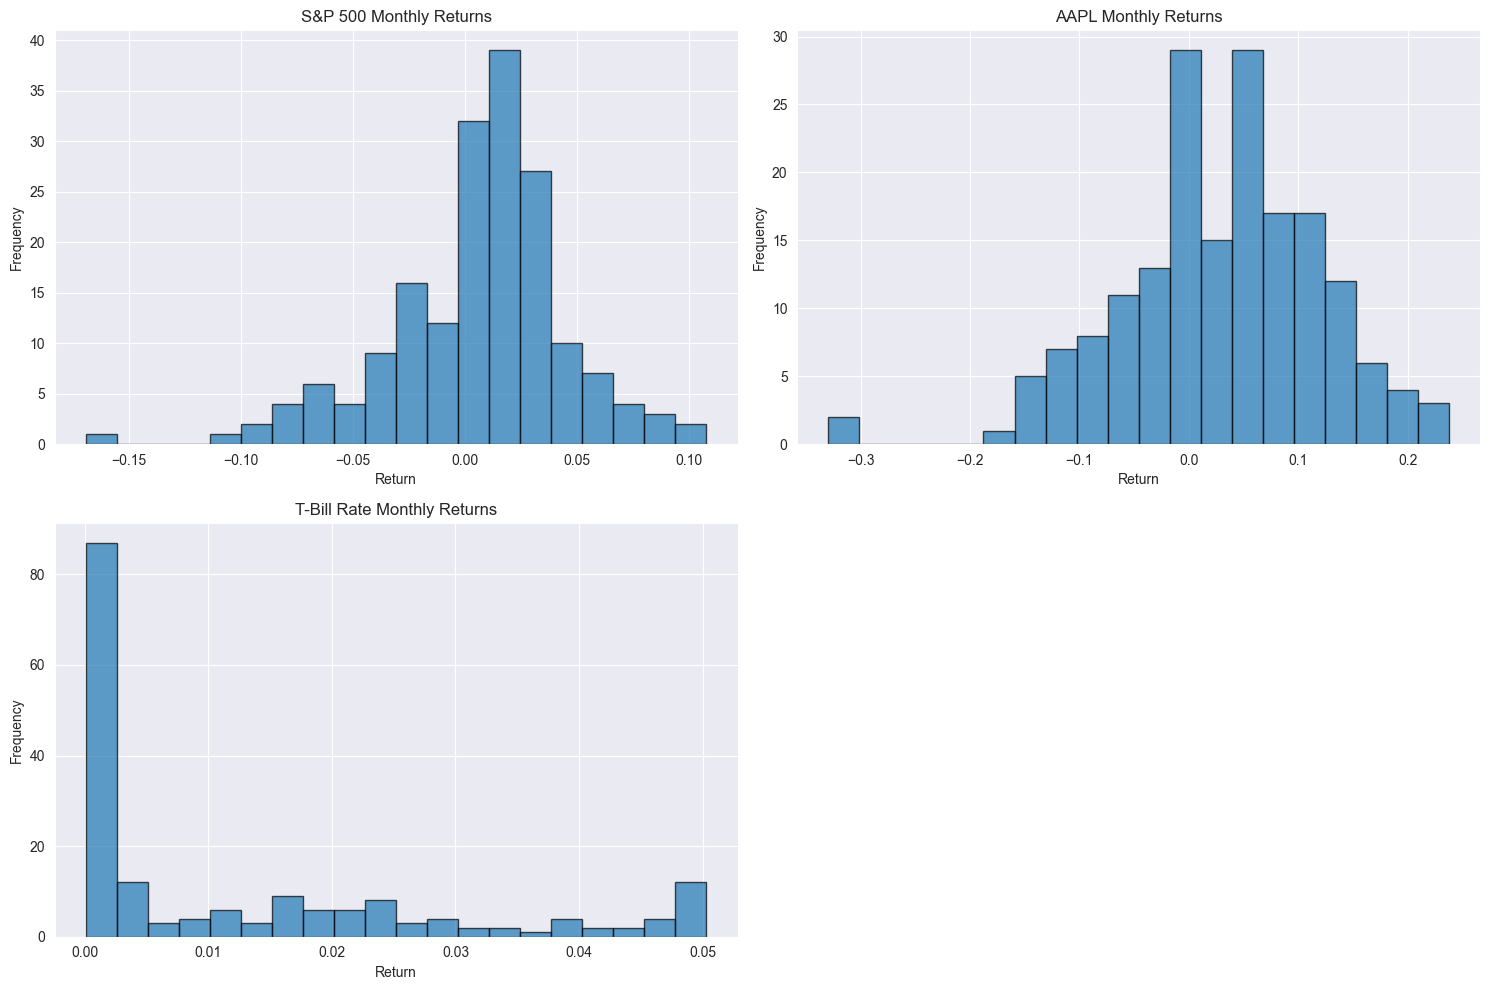

Correlation Matrix:
Ticker                    ^GSPC      AAPL  T-Bill Rate  Monthly Rate  \
Ticker                                                                 
^GSPC                  1.000000  0.549309    -0.031029     -0.031029   
AAPL                   0.549309  1.000000     0.077820      0.077820   
T-Bill Rate           -0.031029  0.077820     1.000000      1.000000   
Monthly Rate          -0.031029  0.077820     1.000000      1.000000   
Excess Return AAPL     0.553776  0.984519    -0.098134     -0.098134   
Excess Return S&P 500  0.928998  0.475182    -0.398732     -0.398732   

Ticker                 Excess Return AAPL  Excess Return S&P 500  
Ticker                                                            
^GSPC                            0.553776               0.928998  
AAPL                             0.984519               0.475182  
T-Bill Rate                     -0.098134              -0.398732  
Monthly Rate                    -0.098134              -0.398732  
E

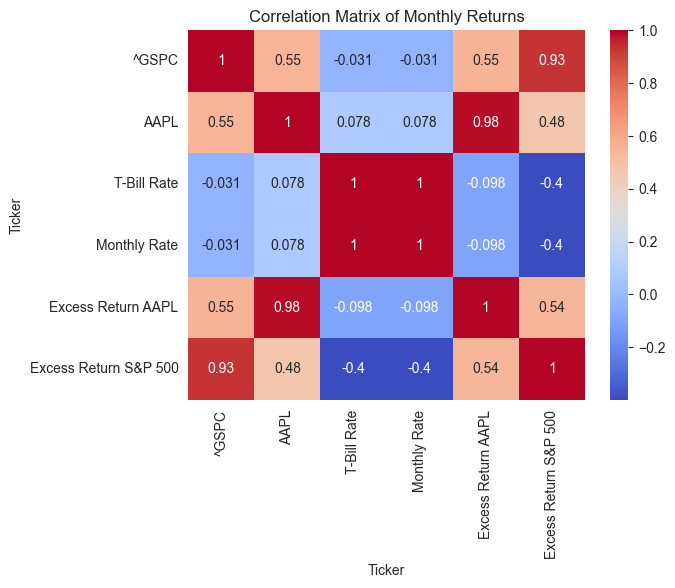

In [198]:
#df.rename(columns={'AAPL': 'Apple', '^GSPC': 'S&P 500'}, inplace=True)
#tbill = t_bill.resample('ME').mean() / 100
#df = df.resample('ME').mean()
#df['T-Bill'] = tbill
df['T-Bill Rate'] = tbill_df['TBill Rate'] 
df['Monthly Rate'] = tbill_df['Monthly Rate']
print(df)

df['Excess Return AAPL'] = df['AAPL'] - df['T-Bill Rate']
df['Excess Return S&P 500'] = df['^GSPC'] - df['T-Bill Rate']

print("Matrix of Return Series with Excess Returns:")
print(df)

# Summary statistics
summary_statistics = df.describe()
print("Summary Statistics:")
print(summary_statistics)

# Plot histograms
plt.figure(figsize=(15, 10))

for i, column in enumerate(df.columns[:3]):
    plt.subplot(2, 2, i + 1)
    plt.hist(df[column].dropna(), bins=20, edgecolor='k', alpha=0.7)
    if column == '^GSPC':
        column = 'S&P 500'
    plt.title(f'{column} Monthly Returns')
    plt.xlabel('Return')
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

# Correlation matrix
correlation_matrix = df.corr()
print("Correlation Matrix:")
print(correlation_matrix)

# Plot correlation matrix
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Monthly Returns')
plt.show()

vi.	Construct a linear regression model with the excess returns : stock excess return being the response variable and S&P500 excess return the predictor. (2 points)

In [199]:
df = df.dropna()
X = df['Excess Return S&P 500']
y = df['Excess Return AAPL']
X = sm.add_constant(X)

model = sm.OLS(y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:     Excess Return AAPL   R-squared:                       0.296
Model:                            OLS   Adj. R-squared:                  0.292
Method:                 Least Squares   F-statistic:                     74.56
Date:                Wed, 19 Feb 2025   Prob (F-statistic):           3.34e-15
Time:                        16:45:28   Log-Likelihood:                 205.85
No. Observations:                 179   AIC:                            -407.7
Df Residuals:                     177   BIC:                            -401.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.02

vii.	Find Beta for the stock based on the model constructed. Test the null hypothesis:                   ; what do you conclude? Draw your conclusion based on p-value.  									(4 points)

In [200]:
beta = model.params['Excess Return S&P 500']
p_value = model.pvalues['Excess Return S&P 500']

print(f"Beta (Excess Return S&P 500): {round(beta, 4)}")
print(f"P-Value: {p_value}")

if p_value < 0.05:
    conclusion = "Reject the null hypothesis. The Beta is statistically significant."
else:
    conclusion = "Fail to reject the null hypothesis. The Beta is not statistically significant."

print(f"Conclusion: {conclusion}")

Beta (Excess Return S&P 500): 1.1466
P-Value: 3.3415652755284122e-15
Conclusion: Reject the null hypothesis. The Beta is statistically significant.


viii.	Obtain beta of the stock from available stock report (refer the financial website that you choose).  Discuss why these two measures are same or different.					(2 points)  

Reponse: 
https://finance.yahoo.com/quote/AAPL/key-statistics/?form=MG0AV3#:~:text=Stock%20Price%20History-,Beta%20(5Y%20Monthly),-1.20 

Referencing the above URL, the most logical reason would be:
1. Yahoo Finance is using a 5-year range compared to the 15-year range we are using. As a result we have more data points to work with to make a more logical decision on the volatility of Apple's stock compared to the overall market. 